In [4]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data from CSV
aaa_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\AAA Historical Data.csv', parse_dates=['Date'], index_col='Date')
aapl_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\AAPL Historical Data.csv', parse_dates=['Date'], index_col='Date')
acb_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\ACB Historical Data.csv', parse_dates=['Date'], index_col='Date')
bid_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\BID Historical Data.csv', parse_dates=['Date'], index_col='Date')
ctg_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\CTG Historical Data.csv', parse_dates=['Date'], index_col='Date')
fpt_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\FPT Historical Data.csv', parse_dates=['Date'], index_col='Date')
gas_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\GAS Historical Data.csv', parse_dates=['Date'], index_col='Date')
nvda_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\NVDA Historical Data.csv', parse_dates=['Date'], index_col='Date')
vcb_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\VCB Historical Data.csv', parse_dates=['Date'], index_col='Date')
vnm_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\VNM Historical Data.csv', parse_dates=['Date'], index_col='Date')

# Convert the 'Price' column to numeric, which will handle commas
aaa_data['Price'] = pd.to_numeric(aaa_data['Price'].str.replace(',', ''), errors='coerce')
acb_data['Price'] = pd.to_numeric(acb_data['Price'].str.replace(',', ''), errors='coerce')
bid_data['Price'] = pd.to_numeric(bid_data['Price'].str.replace(',', ''), errors='coerce')
ctg_data['Price'] = pd.to_numeric(ctg_data['Price'].str.replace(',', ''), errors='coerce')
fpt_data['Price'] = pd.to_numeric(fpt_data['Price'].str.replace(',', ''), errors='coerce')
gas_data['Price'] = pd.to_numeric(gas_data['Price'].str.replace(',', ''), errors='coerce')
vcb_data['Price'] = pd.to_numeric(vcb_data['Price'].str.replace(',', ''), errors='coerce')
vnm_data['Price'] = pd.to_numeric(vnm_data['Price'].str.replace(',', ''), errors='coerce')
nvda_data['Price'] = pd.to_numeric(nvda_data['Price'].str.replace(',', ''), errors='coerce')

# Ensure the DatetimeIndex is sorted
aaa_data = aaa_data.sort_index().asfreq('B')
aapl_data = aapl_data.sort_index().asfreq('B')
acb_data = acb_data.sort_index().asfreq('B')
bid_data = bid_data.sort_index().asfreq('B')
ctg_data = ctg_data.sort_index().asfreq('B')
fpt_data = fpt_data.sort_index().asfreq('B')
gas_data = gas_data.sort_index().asfreq('B')
nvda_data = nvda_data.sort_index().asfreq('B')
vcb_data = vcb_data.sort_index().asfreq('B')
vnm_data = vnm_data.sort_index().asfreq('B')
nvda_data = nvda_data.sort_index().asfreq('B')

# Handle missing values
aaa_data = aaa_data.ffill().bfill()
aapl_data = aapl_data.ffill().bfill()
acb_data = acb_data.ffill().bfill()
bid_data = bid_data.ffill().bfill()
ctg_data = ctg_data.ffill().bfill()
fpt_data = fpt_data.ffill().bfill()
gas_data = gas_data.ffill().bfill()
nvda_data = nvda_data.ffill().bfill()
vcb_data = vcb_data.ffill().bfill()
vnm_data = vnm_data.ffill().bfill()

# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, data is stationary.")
    else:
        print("Weak evidence against the null hypothesis, data is non-stationary.")

# Function to apply differencing to make data stationary
def make_stationary(data):
    data_diff = data.diff().dropna()
    return data_diff

# Perform ADF test before differencing
print("AAA Stationarity Check Before Differencing")
adf_test(aaa_data['Price'])
print("AAPL Stationarity Check Before Differencing")
adf_test(aapl_data['Price'])
print("\nACB Stationarity Check Before Differencing")
adf_test(acb_data['Price'])
print("\nBID Stationarity Check Before Differencing")
adf_test(bid_data['Price'])
print("CTG Stationarity Check Before Differencing")
adf_test(ctg_data['Price'])
print("\nFPT Stationarity Check Before Differencing")
adf_test(fpt_data['Price'])
print("GAS Stationarity Check Before Differencing")
adf_test(gas_data['Price'])
print("\nNVDA Stationarity Check Before Differencing")
adf_test(nvda_data['Price'])
print("VCB Stationarity Check Before Differencing")
adf_test(vcb_data['Price'])
print("\nVNM Stationarity Check Before Differencing")
adf_test(vnm_data['Price'])

# Apply differencing if necessary
if adfuller(aaa_data['Price'])[1] > 0.05:
    aaa_data_diff = make_stationary(aaa_data['Price'])
else:
    aaa_data_diff = aaa_data['Price']

if adfuller(aapl_data['Price'])[1] > 0.05:
    aapl_data_diff = make_stationary(aapl_data['Price'])
else:
    aapl_data_diff = aapl_data['Price']

if adfuller(acb_data['Price'])[1] > 0.05:
    acb_data_diff = make_stationary(acb_data['Price'])
else:
    acb_data_diff = acb_data['Price']

if adfuller(bid_data['Price'])[1] > 0.05:
    bid_data_diff = make_stationary(bid_data['Price'])
else:
    bid_data_diff = bid_data['Price']

if adfuller(ctg_data['Price'])[1] > 0.05:
    ctg_data_diff = make_stationary(ctg_data['Price'])
else:
    ctg_data_diff = ctg_data['Price']

if adfuller(fpt_data['Price'])[1] > 0.05:
    fpt_data_diff = make_stationary(fpt_data['Price'])
else:
    fpt_data_diff = fpt_data['Price']

if adfuller(gas_data['Price'])[1] > 0.05:
    gas_data_diff = make_stationary(gas_data['Price'])
else:
    gas_data_diff = gas_data['Price']

if adfuller(nvda_data['Price'])[1] > 0.05:
    nvda_data_diff = make_stationary(nvda_data['Price'])
else:
    nvda_data_diff = nvda_data['Price']

if adfuller(vcb_data['Price'])[1] > 0.05:
    vcb_data_diff = make_stationary(vcb_data['Price'])
else:
    vcb_data_diff = vcb_data['Price']

if adfuller(vnm_data['Price'])[1] > 0.05:
    vnm_data_diff = make_stationary(vnm_data['Price'])
else:
    vnm_data_diff = vnm_data['Price']

# Perform ADF test after differencing
print("\nAAA Stationarity Check After Differencing")
adf_test(aaa_data_diff)
print("\nAAPL Stationarity Check After Differencing")
adf_test(aapl_data_diff)
print("\nACB Stationarity Check After Differencing")
adf_test(acb_data_diff)
print("\nBID Stationarity Check After Differencing")
adf_test(bid_data_diff)
print("\nCTG Stationarity Check After Differencing")
adf_test(ctg_data_diff)
print("\nFPT Stationarity Check After Differencing")
adf_test(fpt_data_diff)
print("\nGAS Stationarity Check After Differencing")
adf_test(gas_data_diff)
print("\nNVDA Stationarity Check After Differencing")
adf_test(nvda_data_diff)
print("\nVCB Stationarity Check After Differencing")
adf_test(vcb_data_diff)
print("\nVNM Stationarity Check After Differencing")
adf_test(vnm_data_diff)

# Combine stationary data into a single DataFrame for model training
combined_data = pd.DataFrame({
    'AAA': aaa_data_diff,
    'AAPL': aapl_data_diff,
    'ACB': acb_data_diff,
    'BID': bid_data_diff,
    'CTG': ctg_data_diff,
    'FPT': fpt_data_diff,
    'GAS': gas_data_diff,
    'NVDA': nvda_data_diff,
    'VCB': vcb_data_diff,
    'VNM': vnm_data_diff
}).dropna()

# Prepare the data for training
X = combined_data.drop('AAPL', axis=1)  # Use all columns except 'AAPL' as features
y = combined_data['AAPL']  # Predict 'AAPL'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
importance = model.feature_importances_
for i, col in enumerate(X.columns):
    print(f'Feature: {col}, Importance: {importance[i]}')


AAA Stationarity Check Before Differencing
ADF Statistic: -2.326394986023712
p-value: 0.16359630736215458
Weak evidence against the null hypothesis, data is non-stationary.
AAPL Stationarity Check Before Differencing
ADF Statistic: 0.0014364690592023539
p-value: 0.958650719949072
Weak evidence against the null hypothesis, data is non-stationary.

ACB Stationarity Check Before Differencing
ADF Statistic: -0.9627193657288604
p-value: 0.7666176337070778
Weak evidence against the null hypothesis, data is non-stationary.

BID Stationarity Check Before Differencing
ADF Statistic: -1.426179397758938
p-value: 0.5696630445665076
Weak evidence against the null hypothesis, data is non-stationary.
CTG Stationarity Check Before Differencing
ADF Statistic: -1.174686076147442
p-value: 0.6843892493597471
Weak evidence against the null hypothesis, data is non-stationary.

FPT Stationarity Check Before Differencing
ADF Statistic: 3.0750373241150766
p-value: 1.0
Weak evidence against the null hypothesis,

Mean Squared Error: 0.6542326019999989


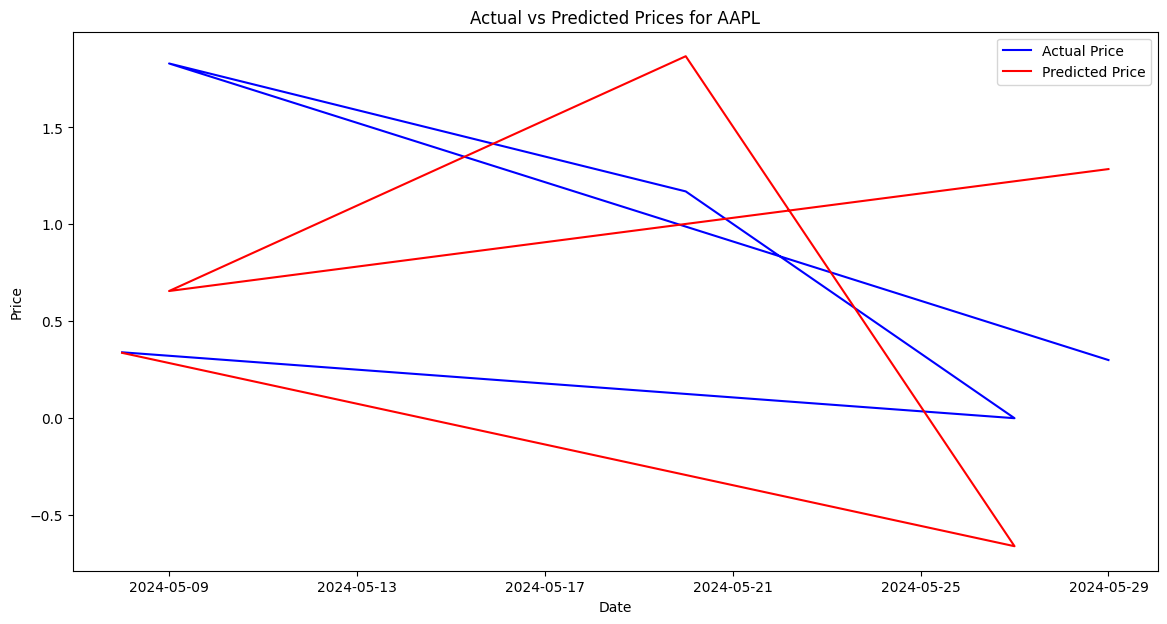

In [5]:
# Combine stationary data into a single DataFrame for model training
combined_data = pd.DataFrame({
    'AAA': aaa_data_diff,
    'AAPL': aapl_data_diff,
    'ACB': acb_data_diff,
    'BID': bid_data_diff,
    'CTG': ctg_data_diff,
    'FPT': fpt_data_diff,
    'GAS': gas_data_diff,
    'NVDA': nvda_data_diff,
    'VCB': vcb_data_diff,
    'VNM': vnm_data_diff
}).dropna()

# Prepare the data for training
X = combined_data.drop('AAPL', axis=1)  # Use all columns except 'AAPL' as features
y = combined_data['AAPL']  # Predict 'AAPL'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices for AAPL')
plt.legend()
plt.show()